# Classical Conditioning and Reinforcement Learning:

The ability of animals to learn appropriate actions in response to particular stimuli on the basis of associated rewards or punishments is a focus of behavioral psychology. The field is traditionally separated into **classical (or
Pavlovian)** and **instrumental (or operant)** conditioning.

- **Classical conditioning**:

The reinforcers (i.e., the rewards or punishments) are delivered
independently of any actions taken by the animal.

- **Instrumental conditioning**:

The actions of the animal determine what reinforcement is provided.

Learning about stimuli or actions solely on the basis of the rewards
and punishments associated with them is called **reinforcement learning**.

## 1. Classical Conditioning:

In the classic Pavlovian experiment, dogs are repeatedly fed just after a
unconditioned bell is rung. Subsequently, the dogs salivate whenever the bell sounds, as
stimulus and response if they expect food to arrive. The food is called the **unconditioned stimulus**. Dogs naturally salivate when they receive food, and salivation is thus called the **unconditioned response**. The bell is called the **conditioned stimulus** because it elicits salivation only under the condition that there has
been prior learning. The learned salivary response to the bell is called the
**conditioned response**. 

In [136]:
from IPython.display import Image
url = 'figM1.png'
Image(url = url, width = 500, height = 500)

## 2. Predicting Reward: 
### The Rescorla-Wagner Rule:
This is a version of the delta rule (chapter 8), the rule is based on a simple linear prediction
of the reward associated with a stimulus.
We use a binary variable $u$ to
represent the presence or absence of the stimulus ($u = 1$ if the stimulus
is present, $u = 0$ if it is absent).
 
**Expected reward** ($v$) is expressed as this stimulus variable multiplied by a weight $w$
$$v = w \cdot u$$
The value of the weight, $w$, is established by a learning rule designed to
minimize the expected squared error between the actual reward $r$ and the
prediction $v$

The delta rules results in the trial-by-trial learning rule known as the Rescorla-Wagner rule,
$$w \rightarrow w + \epsilon \delta u \quad  \text{with} \quad \delta = r-v$$
The crucial term in thislearning rule is the prediction error, $\delta$
If $\epsilon$ is sufficiently small and $u = 1$ on
every trial (the stimulus is always presented), the rule ultimately makes $w$
fluctuate about the equilibrium value $w = <r>$, at which point the average
value of $\delta$ is $0$

In [3]:
url = 'fig9_1.png'
Image(url = url, width = 500, height = 500)

The **filled circles** in figure 9.1 show how learning progresses according to 
the Rescorla-Wagner rule during the **acquisition and extinction phases of
Pavlovian conditioning**. In this example, the stimulus and reward were 
both initially presented on each trial, but later the reward was removed.
The weight approaches the asymptotic limit $w = r$ exponentially during
the rewarded phase of training (conditioning), and exponentially decays
to $w = 0$ during the unrewarded phase (extinction).

#### Partial reinforcement
The Rescorla-Wagner rule also accounts for aspects of the phenomenon
of partial reinforcement, in which a reward is associated with a stimulus
only on a random fraction of trials. 
The open squares in figure 9.1 show what happens to the weight when the reward is associated
with the stimulus 50% of the time. After an initial rise from 0, the weight
varies randomly around an average value of $0.5$.

In [4]:
url = 'tab9_1.png'
Image(url = url, width = 500, height = 500)

### More than one stimulus used in association with a reward:
The Rescorla-Wagner rule must be extended to
include multiple stimuli. This is done by introducing a vector of binary
variables $\vec{u}$, with each of its components representing the presence or absence of a given stimulus, 
together with a vector of weights $\vec{w}$. The expected reward is then the sum of each stimulus parameter multiplied by
its corresponding weight, 
$$v = \vec{w} \cdot \vec{u}$$
Minimizing the prediction error by stochastic gradient descent in this case
gives the delta learning rule,

$$\vec{w} \rightarrow \vec{w} + \epsilon \delta \vec{u} \quad  \text{with} \quad \delta = r-v$$

#### Blocking
In blocking, two stimuli are presented **together** with the reward, but **only after an association has already developed for one stimulus by itself**. In other words, during the pre-training
period, a stimulus is associated with a reward, as in Pavlovian conditioning. Then, **during the training period, a second stimulus is present along
with the first, in association with the same reward**. In this case, the preexisting association of the first stimulus with the reward **blocks** an association from forming between the second stimulus and the reward. Thus,
after training, a **conditioned response is evoked only by the first stimulus**,
not by the second.

Delta rule explanation:

Pre-train $s_1\rightarrow r \Rightarrow w_1 = 1$

Train $w_2 = 0 \Rightarrow v = w_1 u_1 + w_2 u_2 = w_1 u_1 \rightarrow \delta = 0$ no further modification is needed

Result $s_1 \rightarrow r \quad s_2 \rightarrow \bullet$
#### Inhibitory conditioning
A standard way to induce inhibitory conditioning is to use trials in which 
**one stimulus is shown in conjunction with the reward** in alternation with 
trials in which that **stimulus and an additional stimulus are presented in
the absence of reward**. In this case, the **second stimulus** becomes a **conditioned inhibitor**, predicting the absence of reward. This can be demonstrated by presenting a third stimulus that also predicts reward, in conjunction with the inhibitory stimulus, and showing that the net prediction
of reward is reduced. It can also be demonstrated by showing that subsequent learning of a positive association between the inhibitory stimulusand reward is slowed. 

Delta rule explanation:

Train $s_1 + s_2 \rightarrow \bullet \quad s_1 \rightarrow r \Rightarrow w_1 = 1$\
$s_1 + s_2 \rightarrow \bullet \Rightarrow v = w_1 + w_2 = 0 \iff w_2 = -1$

Result $s_1 \rightarrow r \quad s_2 \rightarrow -r$

#### Overshadowing
A further example of the interaction between stimuli is overshadowing. If two stimuli are presented together during training, the prediction of reward is shared between them.

Delta rule explanation:

Train $s_1 + s_2 \rightarrow r$

Result $s_1 \rightarrow \alpha_1 r \quad s_2 \rightarrow \alpha_2 r$
Overshadowing can be encompassed by generalizing the delta rule so that the two stimuli have different learning rates (different values of $\epsilon$), reflecting unequal associabilities

#### Seconday conditioning
Secondary conditioning involves the association of one stimulus with a reward, followed by an association of a second stimulus with the first stimulus (table 9.1). This causes the **second stimulus to evoke expectation of
a reward with which it has never been paired.**

The delta rule **cannot account** for the positive expectation associated with the second
stimulus
Secondary conditioning is **related to the
problem of delayed rewards in instrumental conditioning**. It raises the important issue of keeping track of the
time within a trial in which stimuli and rewards are present.

## 2. Predicting Future Reward: TEMPORAL DIFFERENCE LEARNING
Discrete time varible $t \in 0 \leq t \leq T$ and now we have functions of time stimulus $u(t)$, prediction $v(t)$ and the reward $r(t)$.

In addition to associating stimuli with rewards and punishments, animals
can **learn to predict the future time within a trial at which reinforcement
will be delivered**

* **Initial interpretation:**\
$v(t)$ : Reward predicted to be delivered at time step t
* **1990 Sutton and Barto:**\
$v(t)$ : should be interpreted as
a prediction of the **total future reward** expected from time t onward to the end of the trial
$$<\sum^{T-t}_{\tau = 0} r(t + \tau)>$$
The brackets denote an average over trials.

#### Generalization of v(t):
From linear relationship to:
$$v(t) = \sum^{t}_{\tau = 0} w(\tau) u(t-\tau)$$

The temporal difference learning rule becomes:
$$w(\tau) \rightarrow w(\tau) + \epsilon \delta (t) u(t - \tau) \quad \text{with} \quad \delta (t) = r(t) + v(t+1) - v(t)$$
$\delta (t)$ is usually called the temporal difference error.

In [5]:
url = 'fig9_2.png'
Image(url = url, width = 500, height = 500)

Figure 9.2 shows what happens when the **temporal difference rule** is applied during a training period in which a stimulus appears at time $t = 100$, and a **reward is given for a short interval** around $t = 200$.
Initially $w(\tau) = 0 \quad \forall \tau$

In [154]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])

In [108]:
# gaussian reward
def gaussian(Tmax, a = 0.5, b = 200, c = 1.6):
    """we assume the reward to follow a gaussian function, 
        is important for the integral to be 2 since delta 
        will converge to this value """
    x = np.arange(Tmax)
    return a*np.exp(-((x-b)**2)/(2*c*c))
# total predicted reward
def v_total(Tmax, w, u):
    return np.array([np.sum(w[:t+1]*u[t::-1]) for t in range(Tmax)])
# delta
def delta_update(delta, r, v):
    delta[:-1] = r[:-1] + v[1:] - v[:-1]
    return delta
# updating the weights
def w_update(Tmax, w, delta, u, eps = 1.):
    for t in range(Tmax):
        for tau in range(t):
            w[tau] += eps*delta[t]*u[t-tau]
    return w

In [116]:
Tmax = 220
# reward
r = gaussian(Tmax)
# stimulus presented at t = 100
u = np.zeros(Tmax); u[100] = 1;
# initial weights set to zero
w = np.zeros(Tmax)
# initial total predicted reward
v = v_total(Tmax, w, u)
# preallocating delta
delta = np.zeros(Tmax)
# learning iterations
Imax = int(1.2e2)
delta_3d = np.zeros((Imax, Tmax))
for i in np.arange(0,Imax):
    delta = delta_update(delta, r, v)
    delta_3d[i, :] = delta
    w = w_update(Tmax, w, delta, u)
    v = v_total(Tmax, w, u)
np.savetxt('delta3d', delta_3d) # saving the data to plot it using MATLAB

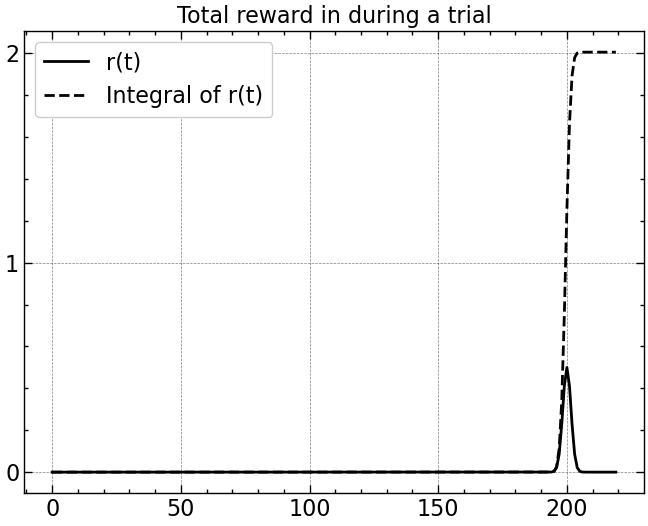

In [181]:
r = gaussian(Tmax)
fig, ax = plt.subplots()
ax.plot(r, 'k-', label = 'r(t)')
ax.plot(np.cumsum(r), 'k--', label = 'Integral of r(t)')
ax.legend()
ax.set_yticks([0, 1, 2])
ax.set_title('Total reward in during a trial')
plt.show()

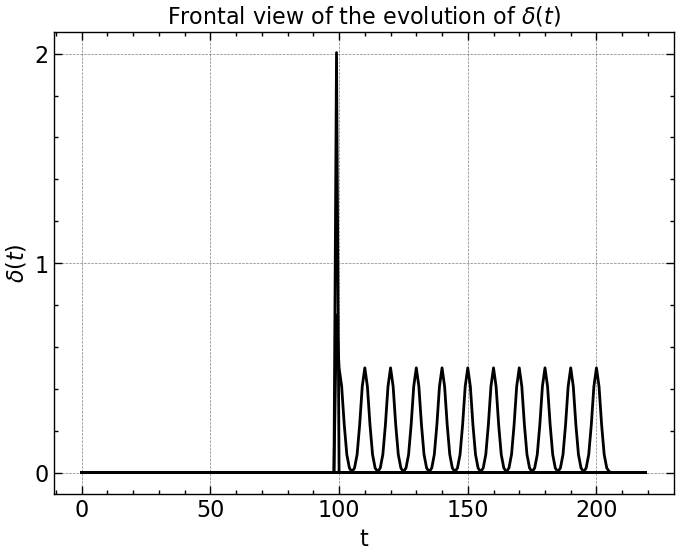

In [157]:
fig, ax = plt.subplots()
for i in range(0, 120, 10):
    ax.plot(delta_3d[i, :], 'k')
ax.set_yticks([0, 1, 2])
ax.set_title('Frontal view of the evolution of ' + r'$\delta(t)$')
ax.set_xlabel('t')
ax.set_ylabel(r'$\delta(t)$')
plt.show()

In [140]:
url = 'ex_92.png'
Image(url = url, width = 1000, height = 1200)

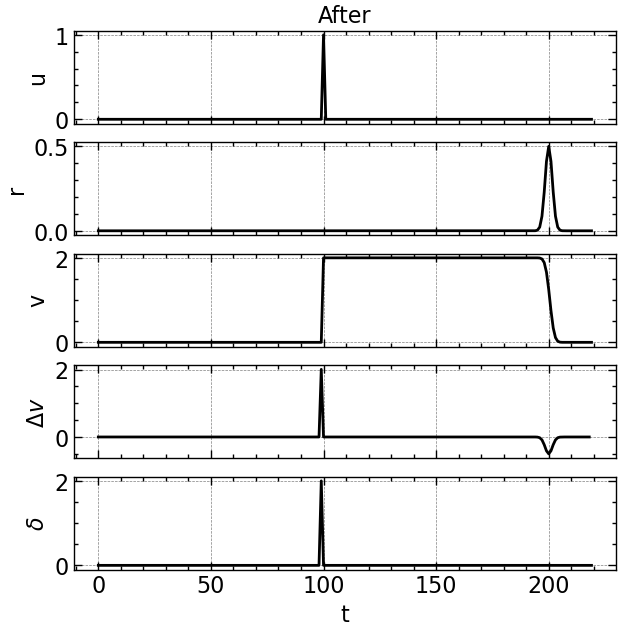

In [189]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (7, 7), sharex = True)
ax1.plot(u, 'k')
ax1.set_ylabel('u')
ax2.plot(r, 'k')
ax2.set_ylabel('r')
ax3.plot(v, 'k')
ax3.set_ylabel('v')
ax4.plot(v[1:]-v[:-1], 'k')
ax4.set_ylabel(r'$\Delta v$')
ax5.plot(delta, 'k')
ax5.set_ylabel(r'$\delta$')
ax5.set_xlabel('t')
ax1.set_title('After')
plt.show()